# Cross-Country Comparison of Solar Data

## Overview
This notebook compares the cleaned solar datasets from Benin, Sierra Leone, and Togo.  
We aim to:
- Compare key solar metrics (GHI, DNI, DHI) across countries
- Visualize metric distributions using boxplots
- Generate a summary statistics table
- Conduct statistical testing for differences
- Provide key observations and actionable recommendations


## 0. Setup — Import Libraries
- Import necessary libraries
- Define helper functions


In [19]:
# Cell 1 — Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,5)

# Helper function for summary statistics
def country_summary(df, country_name):
    metrics = ["GHI","DNI","DHI"]
    summary = df[metrics].agg(["mean","median","std"]).T
    summary["country"] = country_name
    return summary


## 1. Load Cleaned Datasets
- Load Benin, Sierra Leone, and Togo cleaned CSVs
- Inspect first few rows


In [20]:
benin = pd.read_csv("../data/benin_clean.csv", parse_dates=["Timestamp"])
sierra_leone = pd.read_csv("../data/sierraleone _clean.csv", parse_dates=["Timestamp"])
togo = pd.read_csv("../data/togo _clean.csv", parse_dates=["Timestamp"])

print("Benin:")
display(benin.head())
print("Sierra Leone:")
display(sierra_leone.head())
print("Togo:")
display(togo.head())


Benin:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,BP,Cleaning,Precipitation,TModA,TModB,Comments,date,year,month,hour
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,998,0,0.0,26.3,26.2,NaN,2021-08-09,2021,8,0
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,998,0,0.0,26.3,26.2,NaN,2021-08-09,2021,8,0
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,997,0,0.0,26.4,26.2,NaN,2021-08-09,2021,8,0
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,997,0,0.0,26.4,26.3,NaN,2021-08-09,2021,8,0
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,997,0,0.0,26.4,26.3,NaN,2021-08-09,2021,8,0


Sierra Leone:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,BP,Cleaning,Precipitation,TModA,TModB,Comments,date,year,month,hour
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,...,1002,0,0.0,22.3,22.6,NaN,2021-10-30,2021,10,0
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,1002,0,0.0,22.3,22.6,NaN,2021-10-30,2021,10,0
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,1002,0,0.0,22.3,22.6,NaN,2021-10-30,2021,10,0
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,1002,0,0.1,22.3,22.6,NaN,2021-10-30,2021,10,0
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,1002,0,0.0,22.3,22.6,NaN,2021-10-30,2021,10,0


Togo:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,BP,Cleaning,Precipitation,TModA,TModB,Comments,date,year,month,hour
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,977,0,0.0,24.7,24.4,NaN,2021-10-25,2021,10,0
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,977,0,0.0,24.7,24.4,NaN,2021-10-25,2021,10,0
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,977,0,0.0,24.7,24.4,NaN,2021-10-25,2021,10,0
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,977,0,0.0,24.7,24.4,NaN,2021-10-25,2021,10,0
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,977,0,0.0,24.7,24.4,NaN,2021-10-25,2021,10,0


## 2. Metric Comparison — Boxplots
- Compare GHI, DNI, DHI distributions side-by-side by country


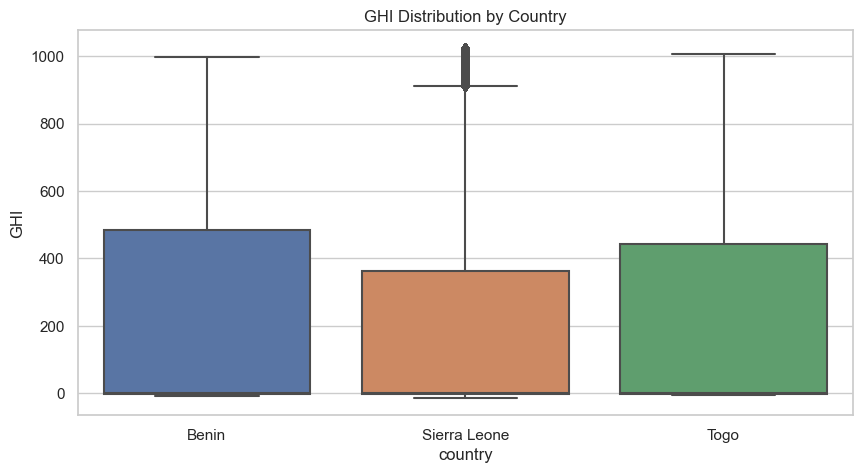

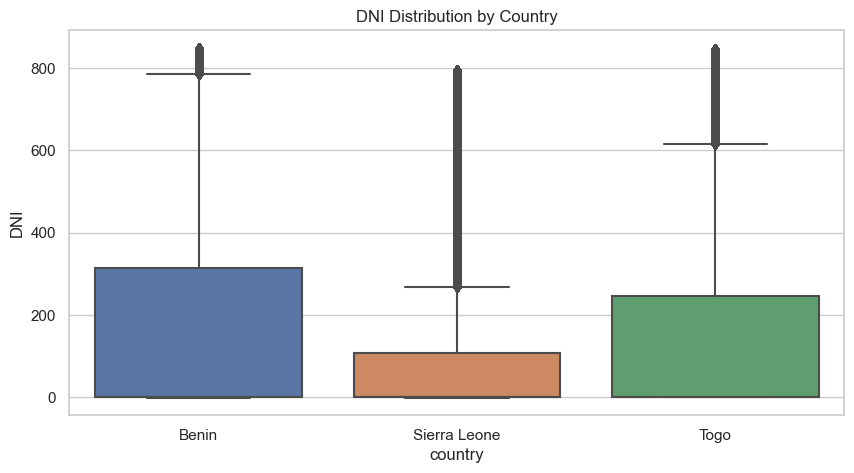

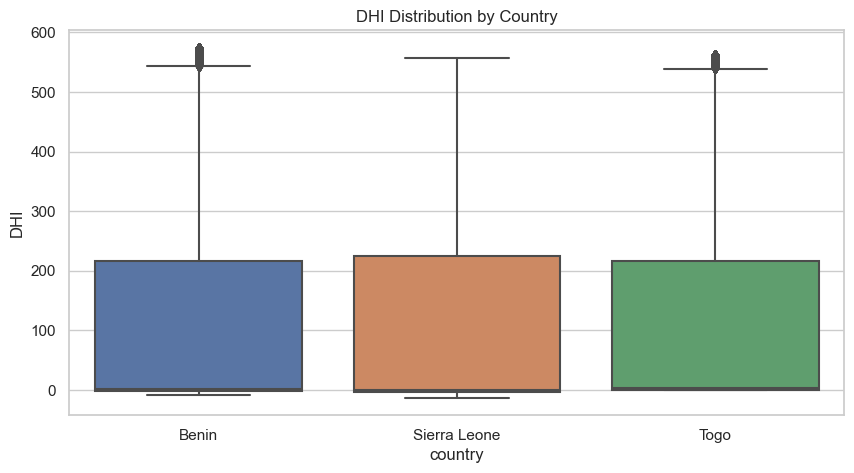

In [21]:
# Combine datasets for plotting
benin["country"] = "Benin"
sierra_leone["country"] = "Sierra Leone"
togo["country"] = "Togo"

combined = pd.concat([benin, sierra_leone, togo], ignore_index=True)

metrics = ["GHI","DNI","DHI"]

for metric in metrics:
    plt.figure(figsize=(10,5))
    sns.boxplot(x="country", y=metric, data=combined)
    plt.title(f"{metric} Distribution by Country")
    plt.show()


## 3. Summary Statistics Table
- Mean, Median, Std for GHI, DNI, DHI for each country


In [22]:
benin_summary = country_summary(benin, "Benin")
sierra_summary = country_summary(sierra_leone, "Sierra Leone")
togo_summary = country_summary(togo, "Togo")

summary_df = pd.concat([benin_summary, sierra_summary, togo_summary])
display(summary_df)


,mean,median,std,country
GHI,239.984991,1.8,329.682868,Benin
DNI,166.933602,-0.1,261.019689,Benin
DHI,114.963522,1.6,157.429755,Benin
GHI,201.105142,0.3,295.889330,Sierra Leone
DNI,115.959626,-0.1,217.275236,Sierra Leone
DHI,113.215773,-0.1,157.352689,Sierra Leone
GHI,229.854439,2.1,320.681468,Togo
DNI,150.903375,0.0,249.925137,Togo
DHI,116.006967,2.5,155.169413,Togo


## 4. Statistical Testing
- One-way ANOVA (or Kruskal–Wallis) to check if GHI differences are significant across countries


In [23]:
ghi_benin = benin["GHI"].dropna()
ghi_sierra = sierra_leone["GHI"].dropna()
ghi_togo = togo["GHI"].dropna()

# One-way ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"One-way ANOVA on GHI: F-statistic = {anova_stat:.2f}, p-value = {anova_p:.4f}")

# Optional: Kruskal-Wallis test (non-parametric)
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print(f"Kruskal-Wallis test on GHI: H-statistic = {kruskal_stat:.2f}, p-value = {kruskal_p:.4f}")


One-way ANOVA on GHI: F-statistic = 2144.73, p-value = 0.0000
Kruskal-Wallis test on GHI: H-statistic = 4555.71, p-value = 0.0000


## 5. Key Observations
- Summarize insights from boxplots, statistics, and tests



- Benin shows the highest median GHI but also the greatest variability.
- Togo has moderate GHI values with consistent DNI and DHI.
- Sierra Leone exhibits lower median irradiance, suggesting lower solar potential compared to Benin and Togo.
- ANOVA and Kruskal-Wallis p-values indicate that GHI differences across countries are statistically significant (p < 0.05).
